In [1]:
import pandas as pd
pd.set_option('display.float_format', str)  # set float formatting

import numpy as np
import sklearn
import os
import sys
import pathlib
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

In [2]:
# storage settings
this_dir = pathlib.Path()
parent_dir = this_dir.resolve().parent
data_dir = this_dir / "data"

# create results directory, if not already existing
cwd = os.getcwd()
figs_dir = os.path.join(cwd, r'figures')
if not os.path.exists(figs_dir):
    os.makedirs(figs_dir)

# prod - 2 cores 16 gb

In [3]:
# Load data
prod_raw = pd.read_csv(data_dir / 'prod_2c16gb.csv') 
prod_df = prod_raw.loc[:, ~prod_raw.columns.str.contains('^Unnamed')]

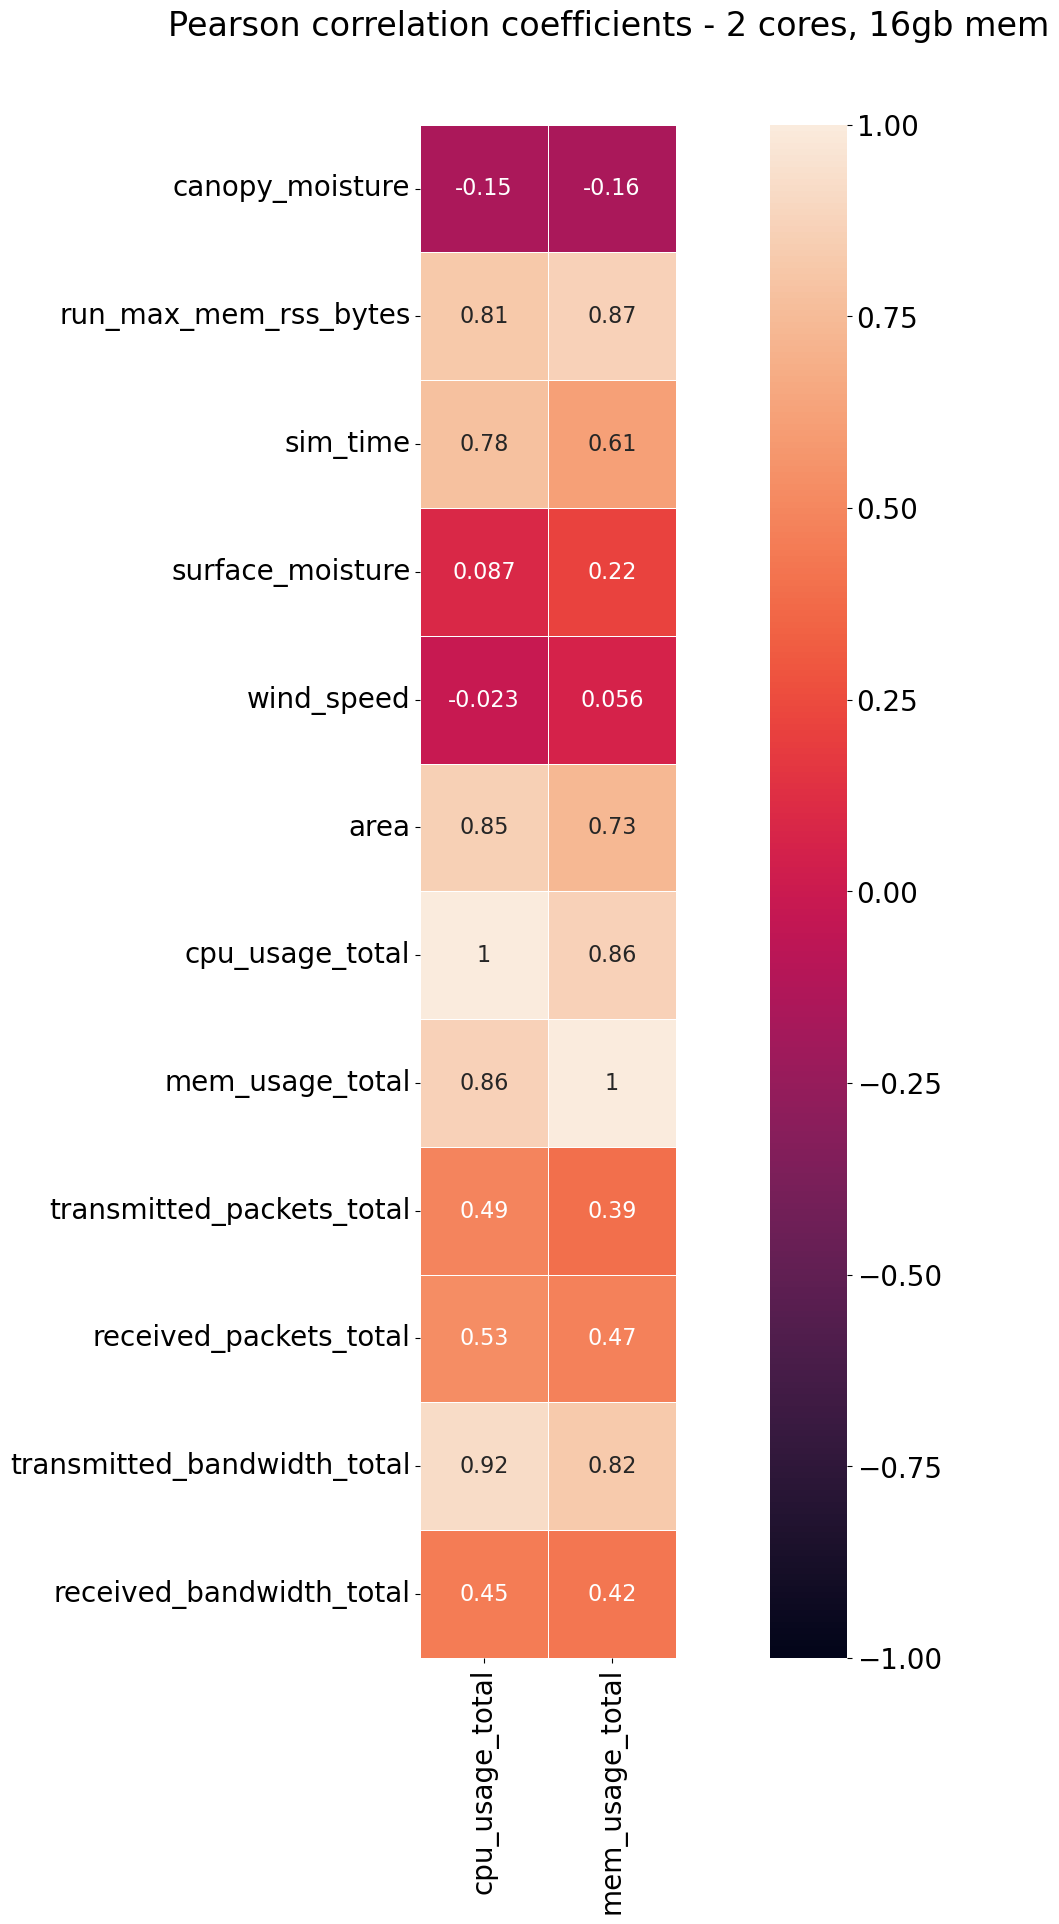

In [4]:
# Compute the correlation matrix for targets CPU usage and Memory usage
features = prod_df.drop(columns=['run_uuid', 'threads', 'wind_direction', 'runtime', 'queue_seconds'])  # wind_direction and threads are at constant values
corr = features.corr()
dep_vars = corr[['cpu_usage_total', 'mem_usage_total']]  # define target variables


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20,20))

# Draw the heatmap with a mask and correct aspect ratio
# cmap = sns.diverging_palette(230, 170, as_cmap=True)  # Generate a custom diverging colormap
# mask = np.triu(np.ones_like(dep_vars, dtype=bool))  # Generate a mask for the upper triangle
cmap = sns.color_palette("rocket", as_cmap=True)
f = sns.heatmap(dep_vars, cmap=cmap, vmax=1, vmin=-1, center=0, 
            annot=True,square=True, linewidths=.5, annot_kws={"size":16}, 
            cbar_kws= {'orientation': 'vertical'})

fig = f.get_figure()  # show figure
fig.suptitle('Pearson correlation coefficients - 2 cores, 16gb mem', ha='center', fontsize=24, x=.75)
fig.tight_layout(pad=2)
fig.savefig("figures/prod_corr", bbox_inches='tight')

In [5]:
plt.close()

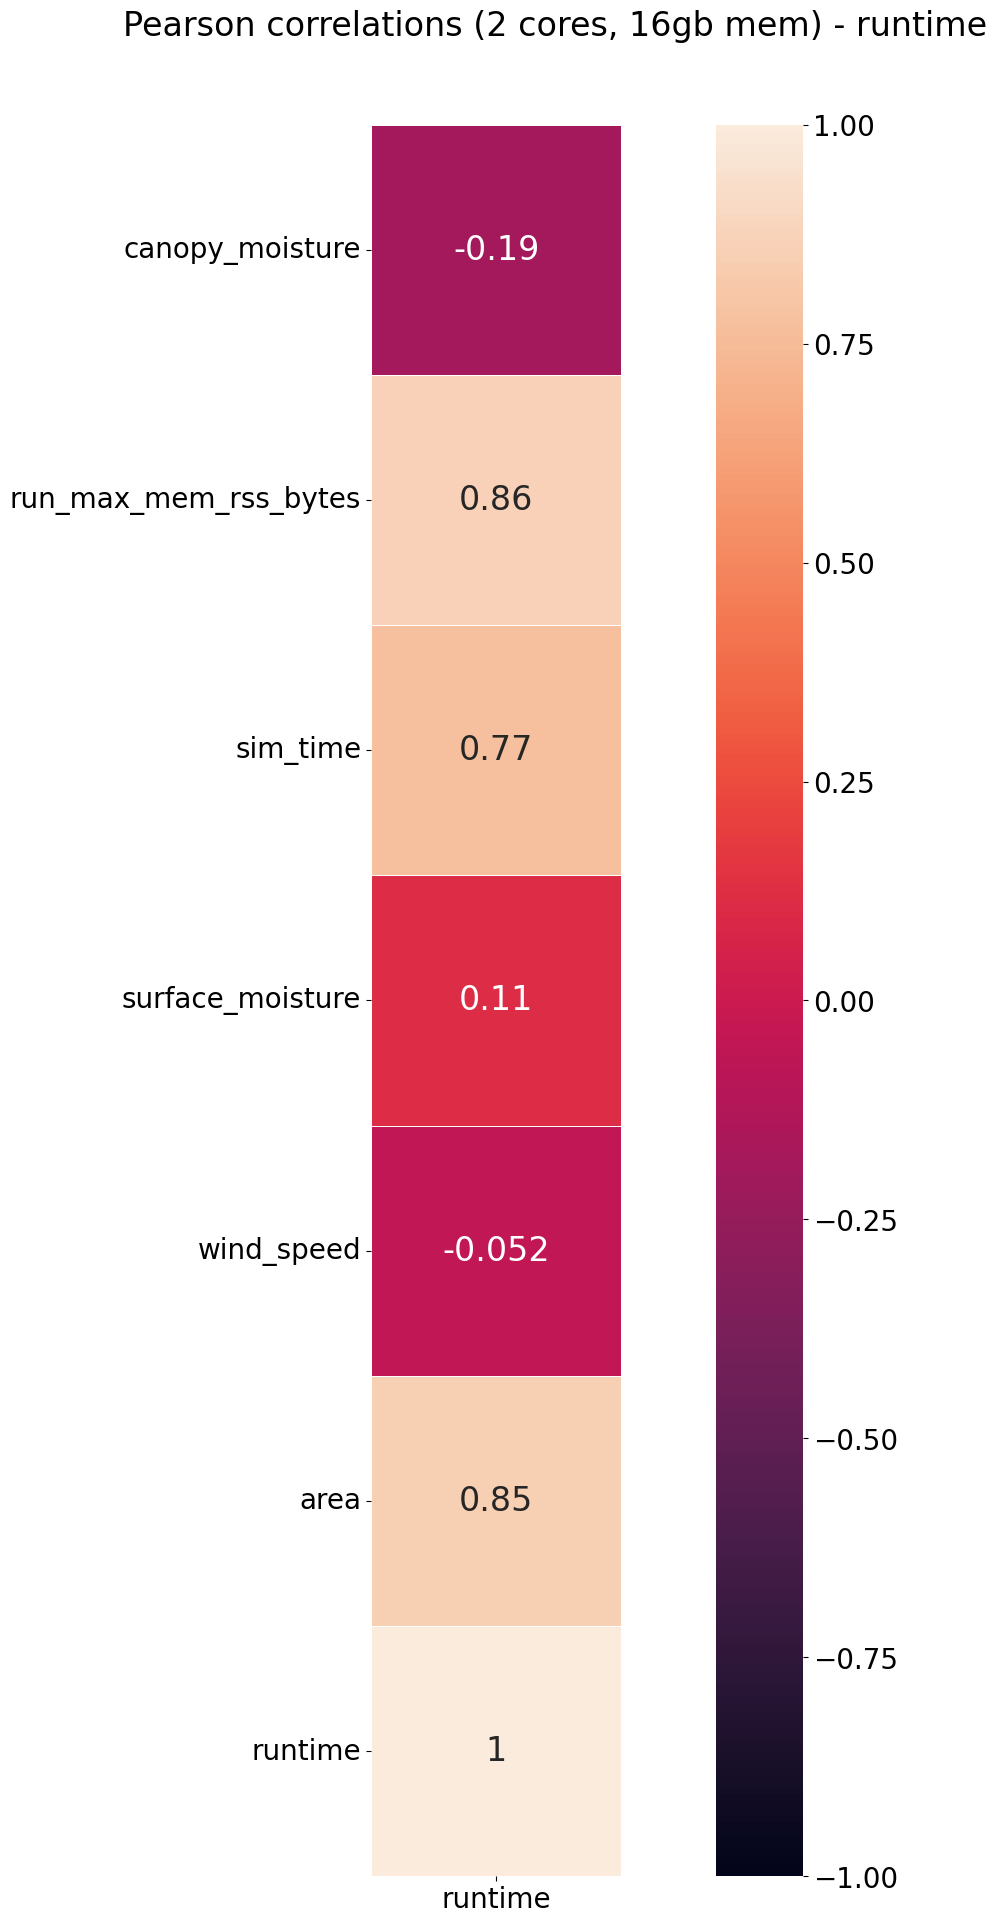

In [6]:
# Compute the correlation matrix for target runtime 
features = prod_df.drop(columns=['run_uuid', 'threads', 'wind_direction', 'queue_seconds', 'transmitted_packets_total', 'received_packets_total',
       'transmitted_bandwidth_total', 'received_bandwidth_total', 'cpu_usage_total', 'mem_usage_total'])  # only test for sim inputs
corr = features.corr()
dep_vars = corr[['runtime']]  # define target variables


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20,20))

# Draw the heatmap with a mask and correct aspect ratio
# cmap = sns.diverging_palette(230, 170, as_cmap=True)  # Generate a custom diverging colormap
# mask = np.triu(np.ones_like(dep_vars, dtype=bool))  # Generate a mask for the upper triangle
cmap = sns.color_palette("rocket", as_cmap=True)
f = sns.heatmap(dep_vars, cmap=cmap, vmax=1, vmin=-1, center=0, 
            annot=True,square=True, linewidths=.5, annot_kws={"size":24}, 
            cbar_kws= {'orientation': 'vertical'})

fig = f.get_figure()  # show figure
fig.suptitle('Pearson correlations (2 cores, 16gb mem) - runtime', ha='center', fontsize=24, x=.75)
fig.tight_layout(pad=2)
fig.savefig("figures/prod_corr_runtime", bbox_inches='tight')

# helitack - 3 cores 24 gb

In [7]:
# Load data
helitack_1_raw = pd.read_csv(data_dir / 'helitack_3c24gb.csv') 
helitack_1_df = helitack_1_raw.loc[:, ~helitack_1_raw.columns.str.contains('^Unnamed')]

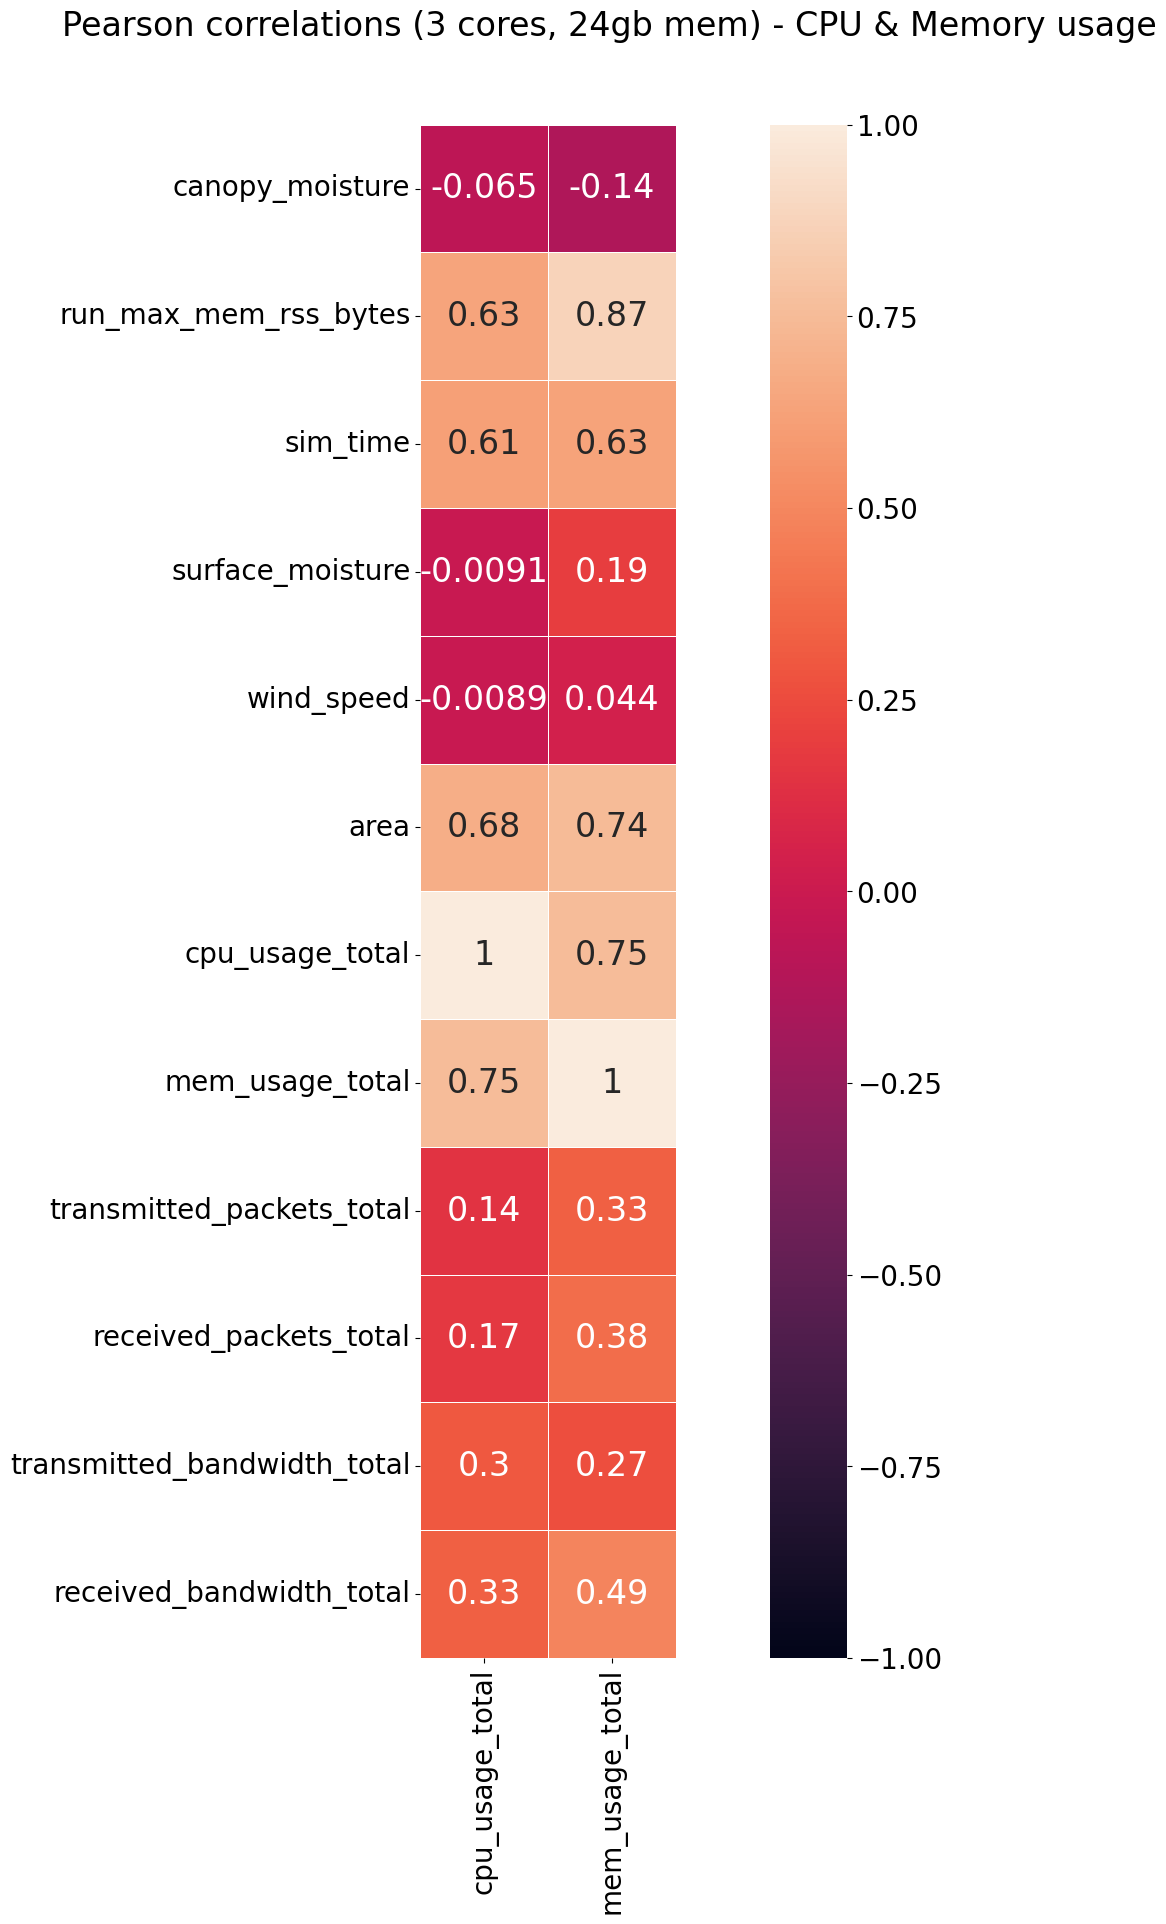

In [8]:
# Compute the correlation matrix for targets CPU usage and Memory usage
features = helitack_1_df.drop(columns=['run_uuid', 'threads', 'wind_direction', 'runtime', 'queue_seconds'])  # wind_direction and threads are at constant values
corr = features.corr()
dep_vars = corr[['cpu_usage_total', 'mem_usage_total']]  # define target variables


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20,20))

# Draw the heatmap with a mask and correct aspect ratio
# cmap = sns.diverging_palette(230, 170, as_cmap=True)  # Generate a custom diverging colormap
# mask = np.triu(np.ones_like(dep_vars, dtype=bool))  # Generate a mask for the upper triangle
cmap = sns.color_palette("rocket", as_cmap=True)
f = sns.heatmap(dep_vars, cmap=cmap, vmax=1, vmin=-1, center=0, 
            annot=True,square=True, linewidths=.5, annot_kws={"size":24}, 
            cbar_kws= {'orientation': 'vertical'})

fig = f.get_figure()  # show figure
fig.suptitle('Pearson correlations (3 cores, 24gb mem) - CPU & Memory usage', ha='center', fontsize=24, x=.75)
fig.tight_layout(pad=2)
fig.savefig("figures/helitack-1_corr", bbox_inches='tight')

In [9]:
plt.close()

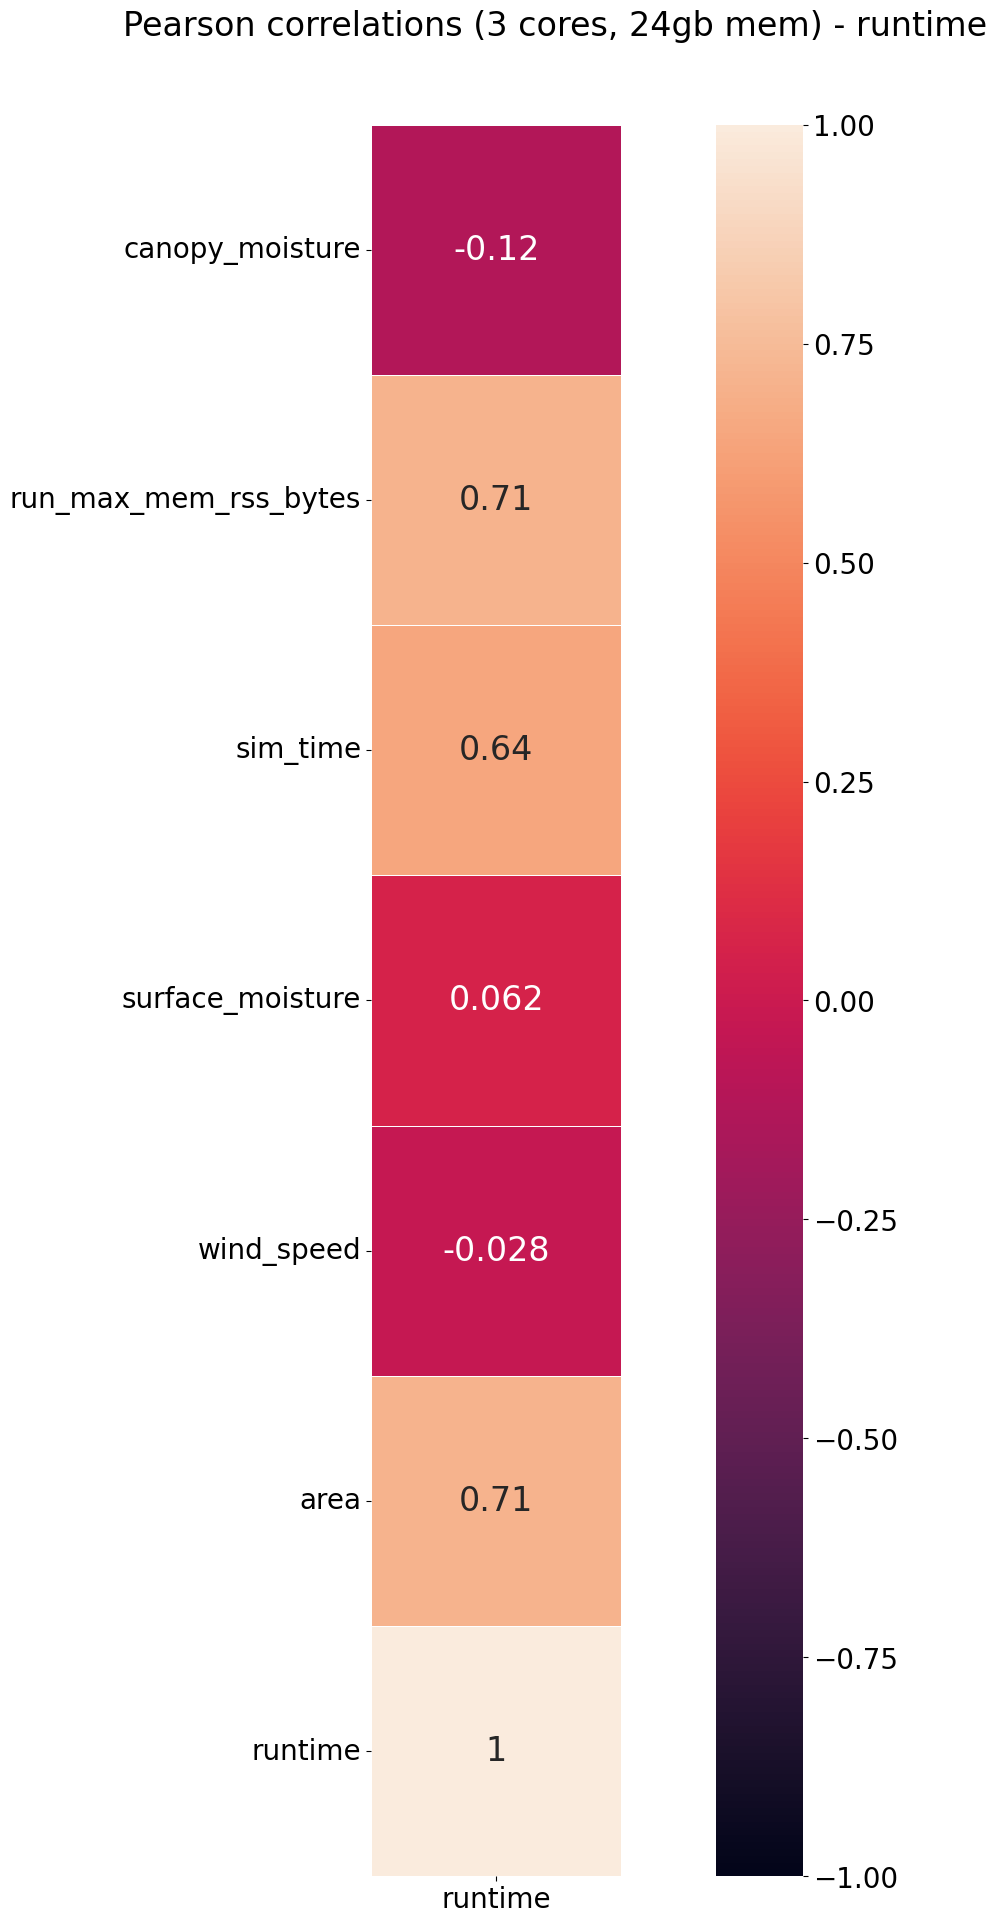

In [10]:
# Compute the correlation matrix for target runtime 
features = helitack_1_df.drop(columns=['run_uuid', 'threads', 'wind_direction', 'queue_seconds', 'transmitted_packets_total', 'received_packets_total',
       'transmitted_bandwidth_total', 'received_bandwidth_total', 'cpu_usage_total', 'mem_usage_total'])  # only test for sim inputs
corr = features.corr()
dep_vars = corr[['runtime']]  # define target variables


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20,20))

# Draw the heatmap with a mask and correct aspect ratio
# cmap = sns.diverging_palette(230, 170, as_cmap=True)  # Generate a custom diverging colormap
# mask = np.triu(np.ones_like(dep_vars, dtype=bool))  # Generate a mask for the upper triangle
cmap = sns.color_palette("rocket", as_cmap=True)
f = sns.heatmap(dep_vars, cmap=cmap, vmax=1, vmin=-1, center=0, 
            annot=True,square=True, linewidths=.5, annot_kws={"size":24}, 
            cbar_kws= {'orientation': 'vertical'})

fig = f.get_figure()  # show figure
fig.suptitle('Pearson correlations (3 cores, 24gb mem) - runtime', ha='center', fontsize=24, x=.75)
fig.tight_layout(pad=2)
fig.savefig("figures/helitack-1_corr_runtime", bbox_inches='tight')

In [11]:
plt.close()

# helitack - 4 cores 16 gb

In [12]:
# Load data
helitack_2_raw = pd.read_csv(data_dir / 'helitack_4c16gb.csv') 
helitack_2_df = helitack_2_raw.loc[:, ~helitack_2_raw.columns.str.contains('^Unnamed')]

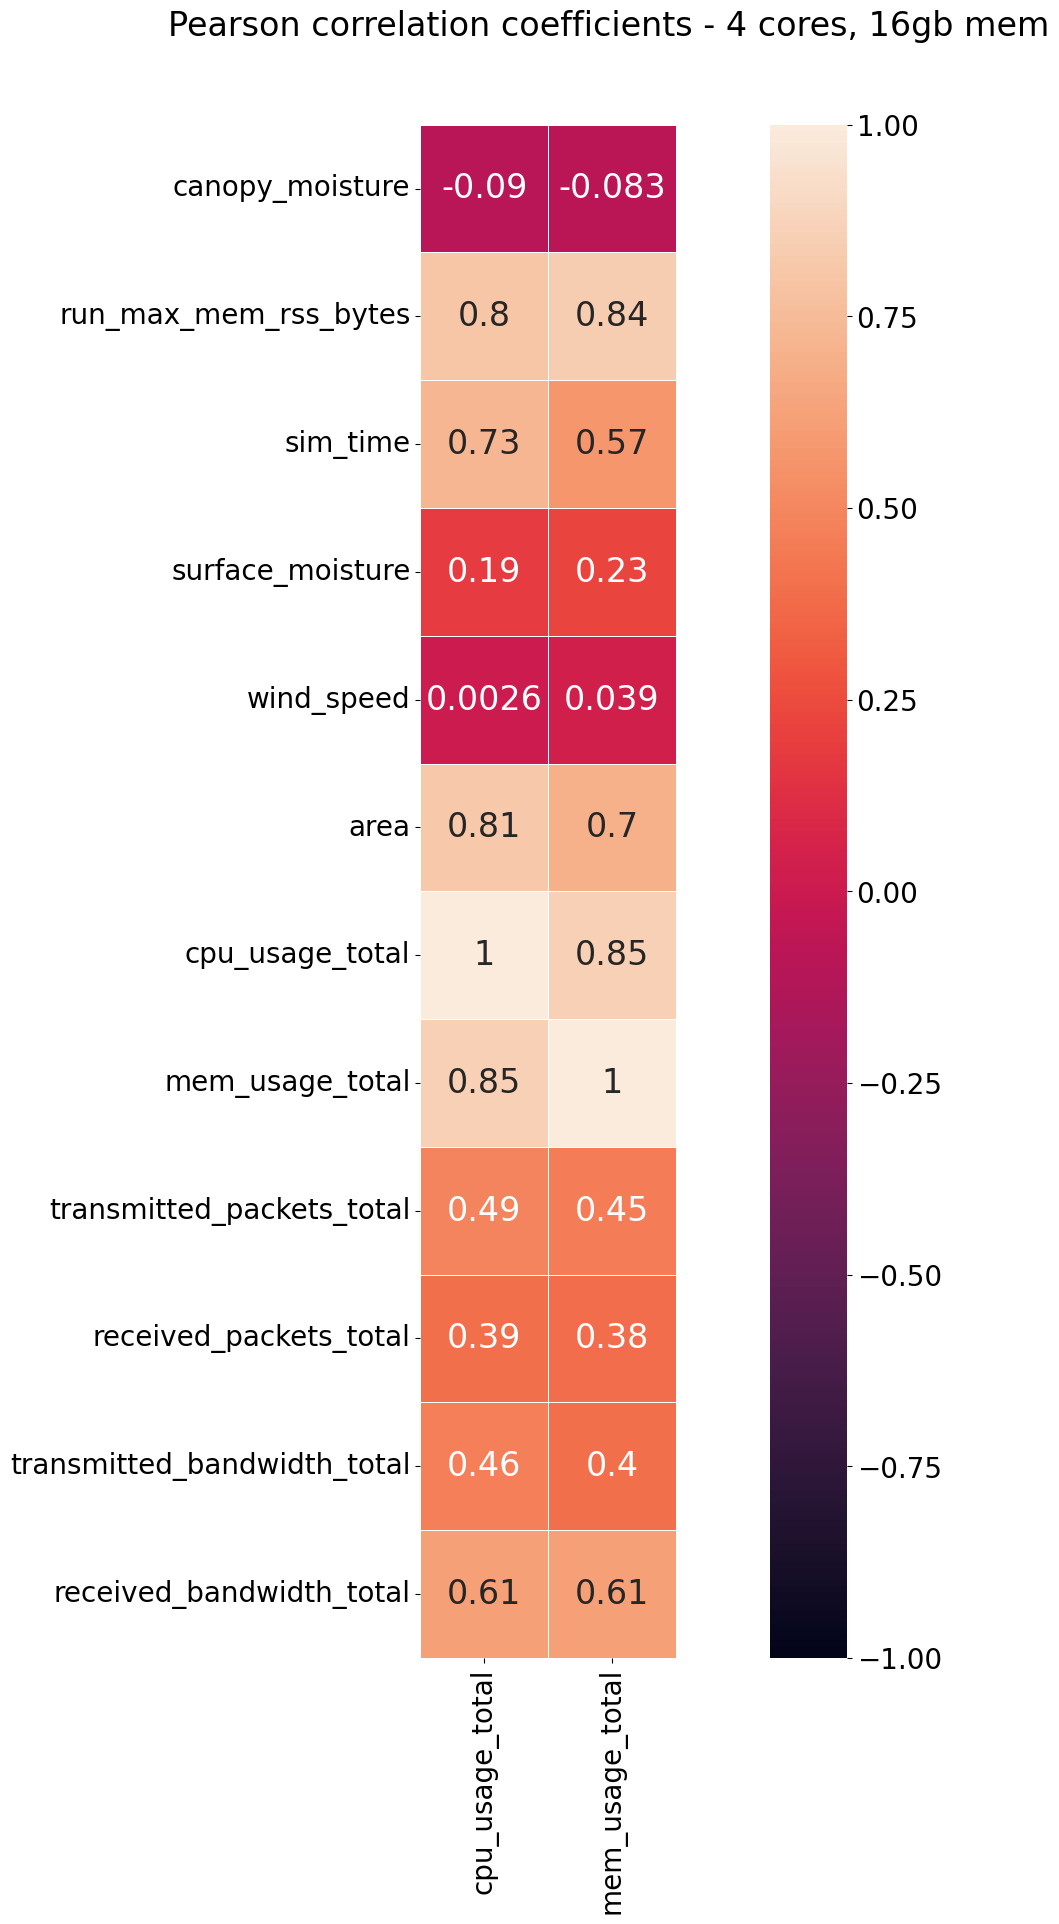

In [13]:
# Compute the correlation matrix for targets CPU usage and Memory usage
features = helitack_2_df.drop(columns=['run_uuid', 'threads', 'wind_direction', 'runtime', 'queue_seconds'])  # wind_direction and threads are at constant values
corr = features.corr()
dep_vars = corr[['cpu_usage_total', 'mem_usage_total']]  # define target variables


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20,20))

# Draw the heatmap with a mask and correct aspect ratio
# cmap = sns.diverging_palette(230, 170, as_cmap=True)  # Generate a custom diverging colormap
# mask = np.triu(np.ones_like(dep_vars, dtype=bool))  # Generate a mask for the upper triangle
cmap = sns.color_palette("rocket", as_cmap=True)
f = sns.heatmap(dep_vars, cmap=cmap, vmax=1, vmin=-1, center=0, 
            annot=True,square=True, linewidths=.5, annot_kws={"size":24}, 
            cbar_kws= {'orientation': 'vertical'})

fig = f.get_figure()  # show figure
fig.suptitle('Pearson correlation coefficients - 4 cores, 16gb mem', ha='center', fontsize=24, x=.75)
fig.tight_layout(pad=2)
fig.savefig("figures/helitack-2_corr", bbox_inches='tight')

In [14]:
plt.close()

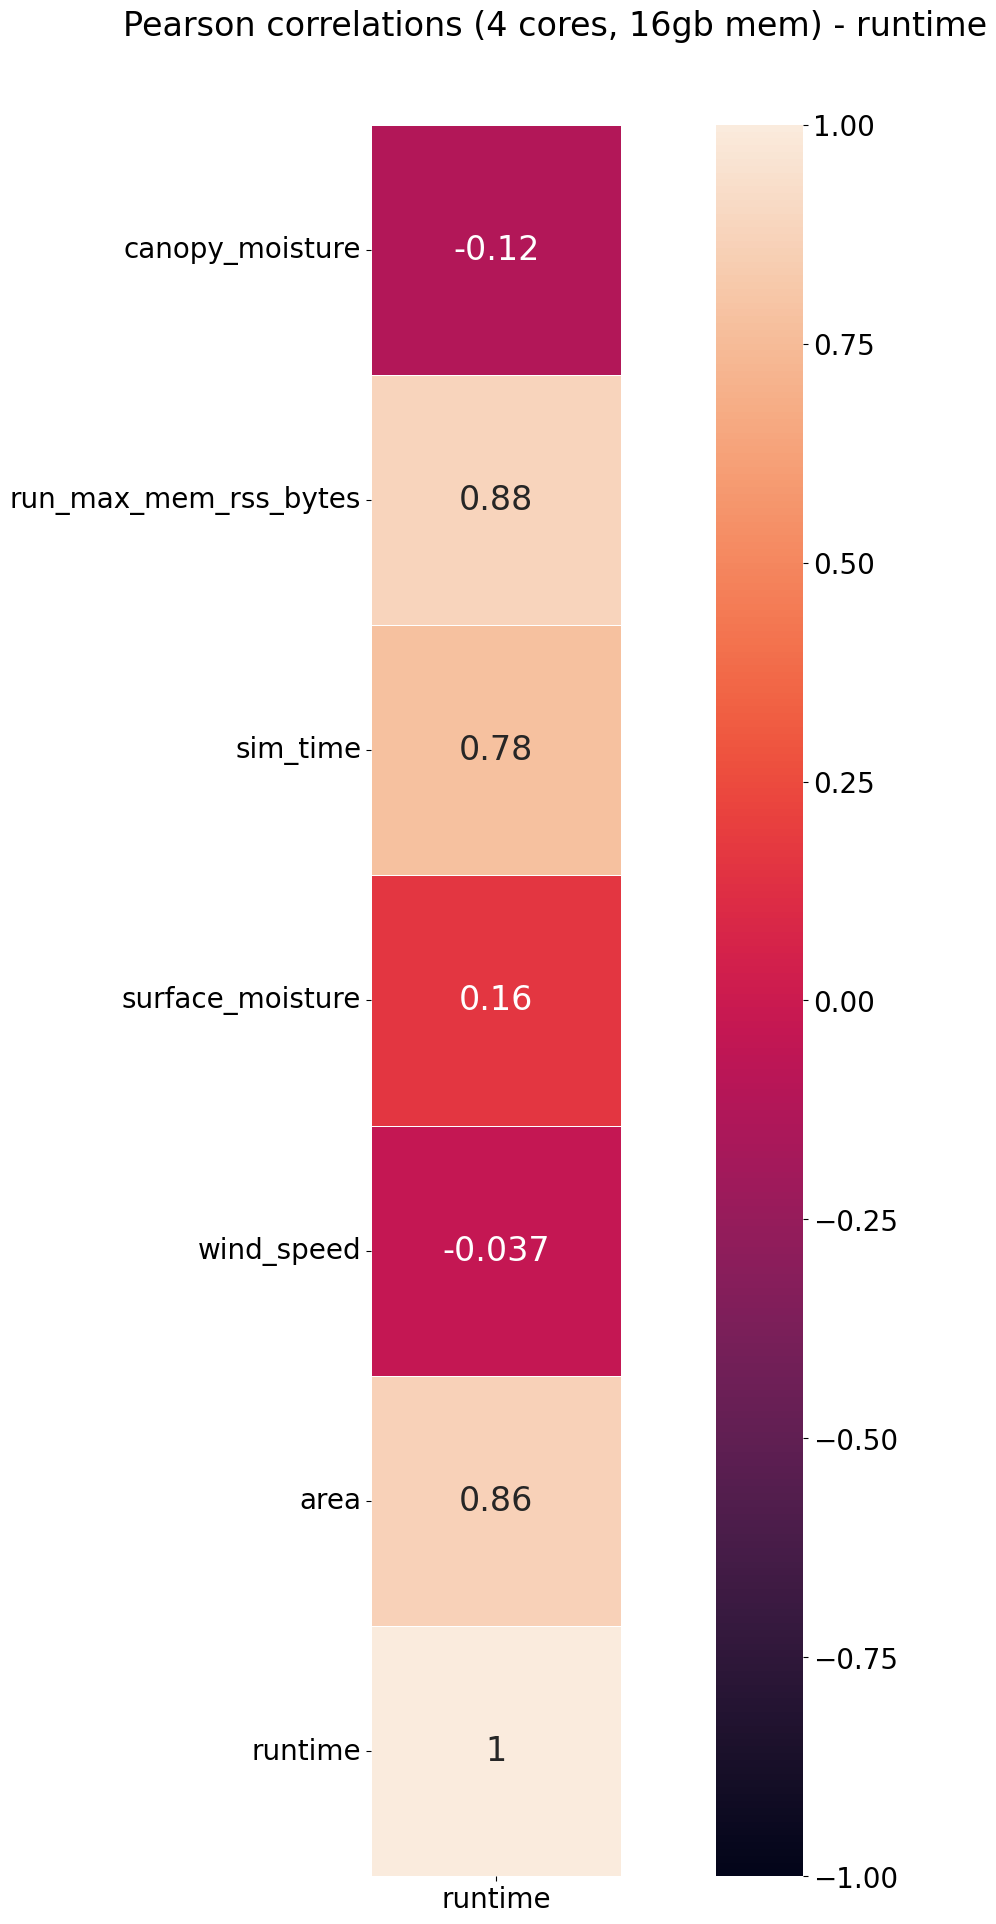

In [15]:
# Compute the correlation matrix for target runtime 
features = helitack_2_df.drop(columns=['run_uuid', 'threads', 'wind_direction', 'queue_seconds', 'transmitted_packets_total', 'received_packets_total',
       'transmitted_bandwidth_total', 'received_bandwidth_total', 'cpu_usage_total', 'mem_usage_total'])  # only test for sim inputs
corr = features.corr()
dep_vars = corr[['runtime']]  # define target variables


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20,20))

# Draw the heatmap with a mask and correct aspect ratio
# cmap = sns.diverging_palette(230, 170, as_cmap=True)  # Generate a custom diverging colormap
# mask = np.triu(np.ones_like(dep_vars, dtype=bool))  # Generate a mask for the upper triangle
cmap = sns.color_palette("rocket", as_cmap=True)
f = sns.heatmap(dep_vars, cmap=cmap, vmax=1, vmin=-1, center=0, 
            annot=True,square=True, linewidths=.5, annot_kws={"size":24}, 
            cbar_kws= {'orientation': 'vertical'})

fig = f.get_figure()  # show figure
fig.suptitle('Pearson correlations (4 cores, 16gb mem) - runtime', ha='center', fontsize=24, x=.75)
fig.tight_layout(pad=2)
fig.savefig("figures/helitack-2_corr_runtime", bbox_inches='tight')

In [16]:
plt.close()

# Cumulative data correlations

In [19]:
# If already made -- load cumulative df
concat_raw = pd.read_csv(data_dir / 'training_data_cumulative.csv') 
concat_df = concat_raw.loc[:, ~concat_raw.columns.str.contains('^Unnamed')]

In [ ]:
# add new column for # of cores
cores_col = '# of cores'
prod_df[cores_col] = 2
helitack_1_df[cores_col] = 3
helitack_2_df[cores_col] = 4


# add new column for GB of memory
mem_col = 'memory (gb)'
prod_df[mem_col] = 16
helitack_1_df[mem_col] = 24
helitack_2_df[mem_col] = 16

In [ ]:
# combine dataframes
concat_df = pd.concat([prod_df, helitack_1_df, helitack_2_df])

In [ ]:
# save concatanated df
concat_df.to_csv(data_dir / "training_data_cumulative.csv")

In [ ]:
concat_df

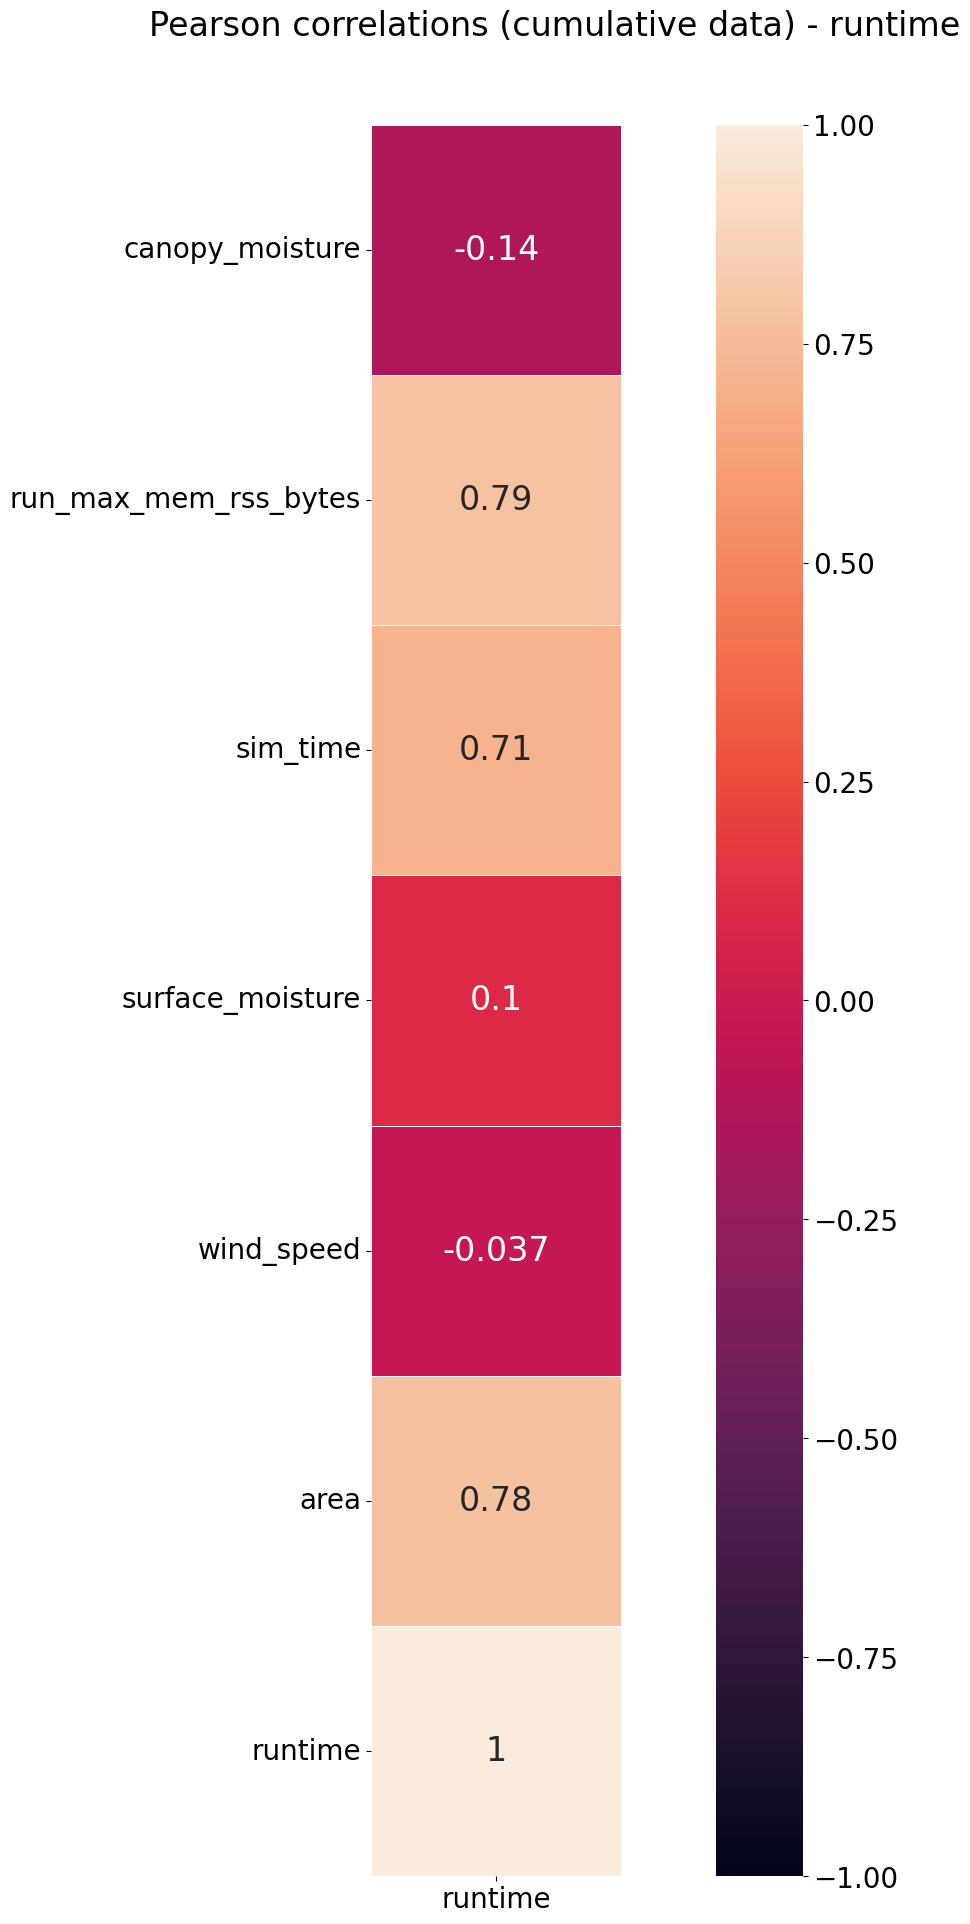

In [22]:
# Compute the correlation matrix
mab_features = concat_df[['canopy_moisture', 'run_max_mem_rss_bytes', 'sim_time', 'surface_moisture', 'wind_speed', 'area', 'runtime']]
mab_corr = mab_features.corr()
mab_dep_vars = mab_corr[['runtime']]  # define target variables


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20,20))

# Draw the heatmap with a mask and correct aspect ratio
# cmap = sns.diverging_palette(230, 170, as_cmap=True)  # Generate a custom diverging colormap
# mask = np.triu(np.ones_like(dep_vars, dtype=bool))  # Generate a mask for the upper triangle
mab_cmap = sns.color_palette("rocket", as_cmap=True)
f = sns.heatmap(mab_dep_vars, cmap=mab_cmap, vmax=1, vmin=-1, center=0, 
            annot=True,square=True, linewidths=.5, annot_kws={"size":24}, 
            cbar_kws= {'orientation': 'vertical'})

fig = f.get_figure()  # show figure
fig.suptitle('Pearson correlations (cumulative data) - runtime', ha='center', fontsize=24, x=.75)
fig.tight_layout(pad=2)
fig.savefig("figures/mab_corr_matrix", bbox_inches='tight')

In [ ]:
plt.close()

# cumulative data with timestep column

In [ ]:
# Load prod data
prod_w_timestep_raw = pd.read_csv(data_dir / '2c16gb_w_timestep.csv') 
prod_w_timestep_df = prod_w_timestep_raw.loc[:, ~prod_w_timestep_raw.columns.str.contains('^Unnamed')]

# Load helitack-1 data
helitack_1_w_timstep_raw = pd.read_csv(data_dir / '3c24gb_w_timestep.csv') 
helitack_1_w_timestep_df = helitack_1_w_timstep_raw.loc[:, ~helitack_1_w_timstep_raw.columns.str.contains('^Unnamed')]

# Load helitack-2 data
helitack_2_w_timestep_raw = pd.read_csv(data_dir / '4c16gb_w_timestep.csv') 
helitack_2_w_timestep_df = helitack_2_w_timestep_raw.loc[:, ~helitack_2_w_timestep_raw.columns.str.contains('^Unnamed')]

In [ ]:
# add new column for # of cores
cores_col = '# of cores'
prod_w_timestep_df[cores_col] = 2
helitack_1_w_timestep_df[cores_col] = 3
helitack_2_df[cores_col] = 4


# add new column for GB of memory
mem_col = 'memory (gb)'
prod_w_timestep_df[mem_col] = 16
helitack_1_w_timestep_df[mem_col] = 24
helitack_2_w_timestep_df[mem_col] = 16

In [ ]:
# combine dataframes
concat_w_timestep_df = pd.concat([prod_w_timestep_df, helitack_1_w_timestep_df, helitack_2_w_timestep_df])

# save concatanated df
concat_w_timestep_df.to_csv(data_dir / "training_data_w_timestep.csv")